In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('weather_dataset_new320.csv')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.dropna(subset=['Date','Location','Latitude','Longitude','Altitude','T2M','T2MWET','TS','T2M_RANGE','T2M_MAX','T2M_MIN','QV2M','RH2M','PRECTOTCORR','PS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE'])


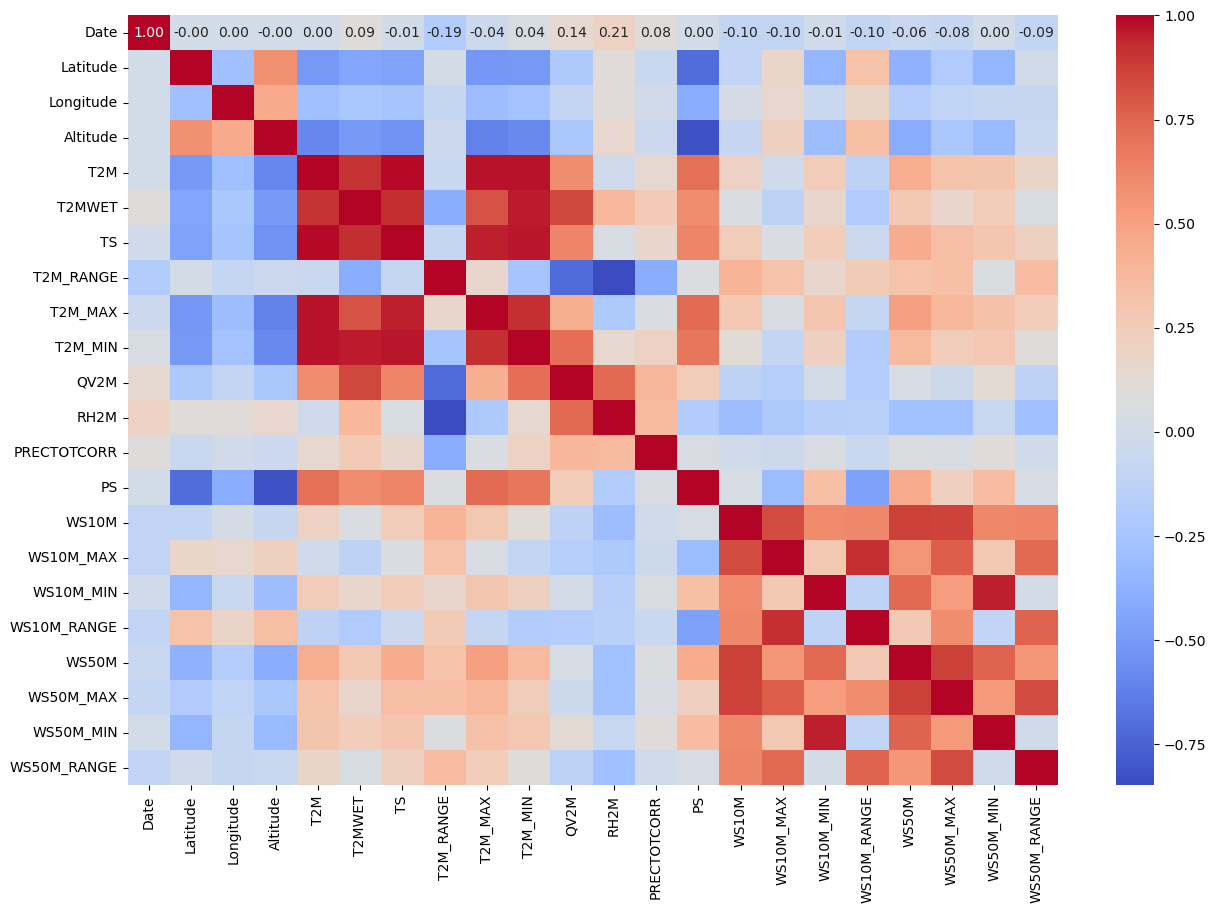

In [3]:
# Drop the 'Location' column
data_without_location = data.drop(['Location'], axis=1)

# Compute the correlation matrix
correlation_matrix = data_without_location.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [4]:
# Identify features with high correlation with the target variable 'T2M'
target = 'TS'
correlation_threshold = 0.5

# Extract the correlation values for the target variable
correlations = correlation_matrix[target].abs()

# Select features with correlation above the threshold
significant_features = correlations[correlations > correlation_threshold].index.tolist()
significant_features.remove(target)  # Remove the target itself from the list
print(f"Significant features based on correlation: {significant_features}")


Significant features based on correlation: ['Altitude', 'T2M', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'PS']


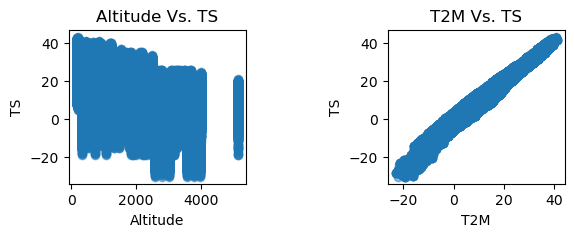

In [65]:
plt.subplot(2,2,1)
plt.scatter(data['Altitude'],data['TS'],alpha=0.5)
plt.xlabel('Altitude')
plt.ylabel('TS')
plt.title('Altitude Vs. TS')


plt.subplot(2,2,2)
plt.scatter(data['T2M'],data['TS'],alpha=0.5)
plt.xlabel('T2M')
plt.ylabel('TS')
plt.title('T2M Vs. TS')

plt.subplots_adjust(wspace=0.8, hspace=0.4)

plt.show()

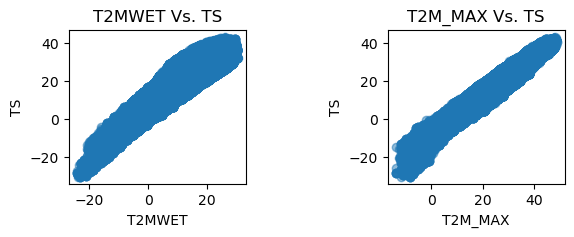

In [68]:
plt.subplot(2,2,3)
plt.scatter(data['T2MWET'],data['TS'],alpha=0.5)
plt.xlabel('T2MWET')
plt.ylabel('TS')
plt.title('T2MWET Vs. TS')

plt.subplot(2,2,4)
plt.scatter(data['T2M_MAX'],data['TS'],alpha=0.5)
plt.xlabel('T2M_MAX')
plt.ylabel('TS')
plt.title('T2M_MAX Vs. TS')
plt.subplots_adjust(wspace=0.8, hspace=0.4)

plt.show()

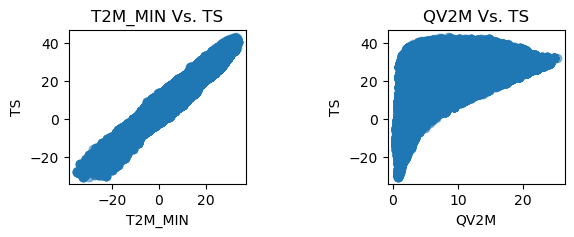

In [67]:
plt.subplot(2,2,1)
plt.scatter(data['T2M_MIN'],data['TS'],alpha=0.5)
plt.xlabel('T2M_MIN')
plt.ylabel('TS')
plt.title('T2M_MIN Vs. TS')

plt.subplot(2,2,2)
plt.scatter(data['QV2M'],data['TS'],alpha=0.5)
plt.xlabel('QV2M')
plt.ylabel('TS')
plt.title('QV2M Vs. TS')
plt.subplots_adjust(wspace=0.8, hspace=0.4)

plt.show()

Text(0.5, 1.0, 'PS Vs. TS')

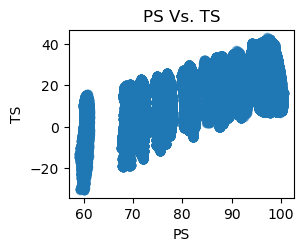

In [55]:
plt.subplot(2,2,4)
plt.scatter(data['PS'],data['TS'],alpha=0.5)
plt.xlabel('PS')
plt.ylabel('TS')
plt.title('PS Vs. TS')



In [5]:
# Select significant features and target variable
features = ['Altitude', 'T2M', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'PS']
target = 'TS'

# Split the data into training and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # Assuming you want to track MSE
import time

# Assuming X and y are defined elsewhere in your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(
    n_estimators=10,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=1,
    subsample=0.8,
    random_state=42
)

start_time = time.time()  

for epoch in range(1, model.n_estimators + 1):
    start_epoch_time = time.time()
    model.fit(X_train, y_train)  
    epoch_time = time.time() - start_epoch_time
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Epoch: {epoch}, MSE: {mse:.4f}, Epoch Time: {epoch_time:.2f}s")

total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")


Epoch: 1, MSE: 12.5378, Epoch Time: 44.50s
Epoch: 2, MSE: 12.5378, Epoch Time: 44.63s
Epoch: 3, MSE: 12.5378, Epoch Time: 44.82s
Epoch: 4, MSE: 12.5378, Epoch Time: 44.95s
Epoch: 5, MSE: 12.5378, Epoch Time: 45.03s
Epoch: 6, MSE: 12.5378, Epoch Time: 45.14s
Epoch: 7, MSE: 12.5378, Epoch Time: 45.14s
Epoch: 8, MSE: 12.5378, Epoch Time: 45.21s
Epoch: 9, MSE: 12.5378, Epoch Time: 45.15s
Epoch: 10, MSE: 12.5378, Epoch Time: 45.21s
Total Training Time: 451.89s


RMSE: 3.5408813503806704


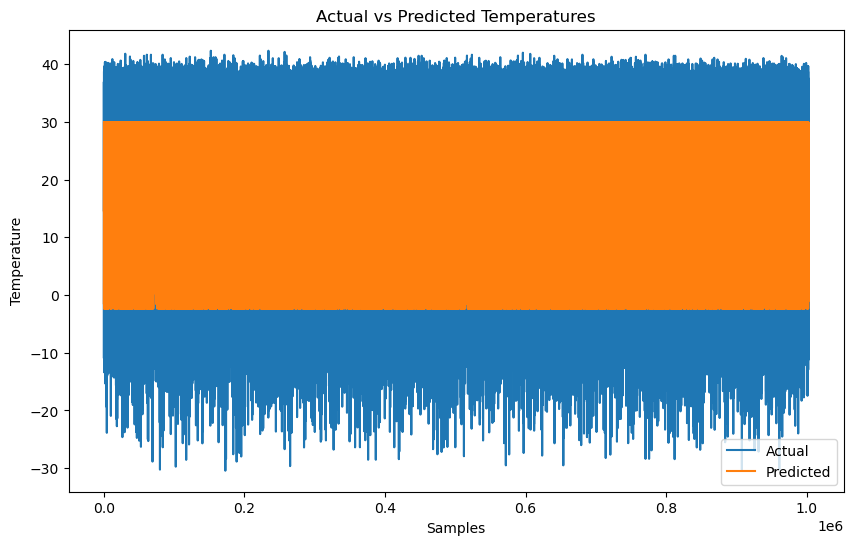

In [21]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Plot actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperatures')
plt.show()


In [22]:
# Save the model to a file
joblib.dump(model, 'saved_models/temperature_predictor.pkl')
print("Model saved to temperature_predictor.pkl")


Model saved to temperature_predictor.pkl


In [25]:
# Load the model from the file
model = joblib.load('saved_models/temperature_predictor.pkl')

# Example of making predictions with the loaded model
example_data = pd.DataFrame({
    'Altitude': [89],
    'T2M': [8.0],
    'T2MWET': [10.3],
    'T2M_MAX': [18.8],
    'T2M_MIN': [5.6],
    'QV2M': [6.3],
    'PS': [97.6]
})

prediction = model.predict(example_data)
print(f'Predicted Temperature: {prediction[0]}')


Predicted Temperature: 10.664001033245372
